In [2]:
import os
import pandas as pd

CSV files from Kaggle, Sumo Wrestling Match Resuults- https://www.kaggle.com/datasets/thedevastator/sumo-wrestling-matches-results-1985-2019

In [5]:
# made a folder of csvs
csv_folder = "sumo_folder"

# extracting the year, count, and kimarite from each csv
top_kimarite_df = pd.DataFrame(columns=['Year', 'Count'])

# csv loop
for filename in os.listdir(csv_folder):
    if filename.endswith(".csv"):
        year = filename.split(".")[0]
        df = pd.read_csv(os.path.join(csv_folder, filename))
        top_kimarite = df['kimarite'].value_counts().nlargest(10).reset_index(name='Count')
        top_kimarite['Year'] = year
        top_kimarite['Filename'] = filename
        top_kimarite = top_kimarite.rename(columns={'index': 'Kimarite'})
        top_kimarite = top_kimarite.reset_index(drop=True)
        top_kimarite_df = top_kimarite_df.append(top_kimarite, ignore_index=True)

# sweet new csv file
top_kimarite_df.to_csv('top_kimarite_all_years.csv', index=False)
# should have used pd.concat, for sure next time..

C:\Users\nedov\AppData\Local\Temp\ipykernel_14456\978826523.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_kimarite_df = top_kimarite_df.append(top_kimarite, ignore_index=True)
C:\Users\nedov\AppData\Local\Temp\ipykernel_14456\978826523.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_kimarite_df = top_kimarite_df.append(top_kimarite, ignore_index=True)
C:\Users\nedov\AppData\Local\Temp\ipykernel_14456\978826523.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_kimarite_df = top_kimarite_df.append(top_kimarite, ignore_index=True)
C:\Users\nedov\AppData\Local\Temp\ipykernel_14456\978826523.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [6]:
top_kimarite = pd.read_csv('top_kimarite_all_years.csv')

In [7]:
top_kimarite.head()
# haha it worked

,Year,Count,Kimarite,Filename
0,1983,1764,yorikiri,1983.csv
1,1983,810,oshidashi,1983.csv
2,1983,372,hatakikomi,1983.csv
3,1983,358,uwatenage,1983.csv
4,1983,320,yoritaoshi,1983.csv


In [8]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import ticker
# Load the Roboto font, I just got it for this
roboto_font = fm.FontProperties(fname='\\Users\\nedov\\Downloads\\Roboto\\Roboto-Regular.ttf')


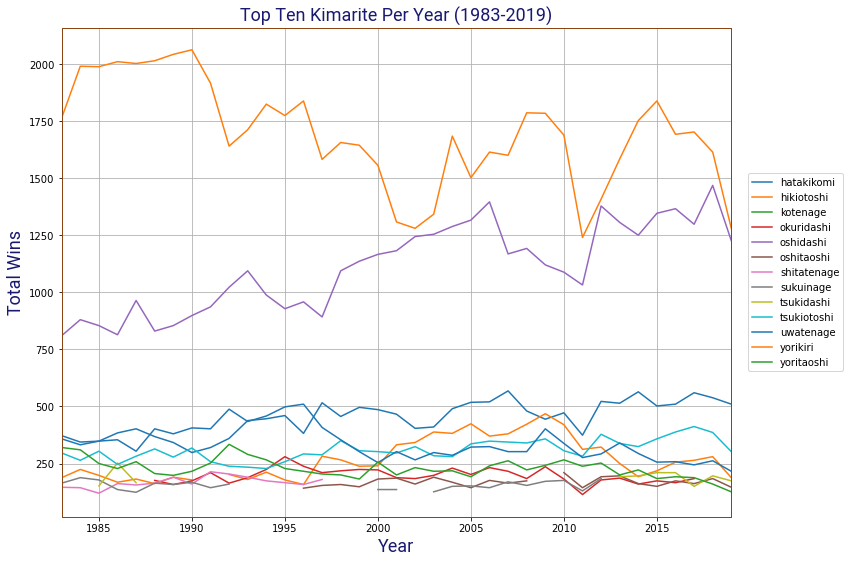

In [9]:
# creating a pivot to use
pivot_kimarite = top_kimarite.pivot_table(index='Year', columns='Kimarite', values='Count')

# time series time
kimarite_time_series = pivot_kimarite.plot(kind='line', figsize=(12, 9))

plt.title('Top Ten Kimarite Per Year (1983-2019)', fontproperties=roboto_font, fontsize=18, fontweight='bold', color='midnightblue')
plt.xlabel('Year', fontproperties=roboto_font, fontsize=18, fontweight='bold', color='midnightblue')
plt.ylabel('Total Wins', fontproperties=roboto_font, fontsize=18, fontweight='bold', color='midnightblue')

for spine in kimarite_time_series.spines.values():
    spine.set_edgecolor('saddlebrown')
    spine.set_linewidth(1)

kimarite_time_series.legend(loc='center right', bbox_to_anchor=(1.175, 0.5))
kimarite_time_series.grid(which='both', alpha=1)
plt.style.use('_mpl-gallery')

# this style really changes things 
kimarite_time_series.ticklabel_format(useOffset=False)
plt.xlim(1983, 2019)

plt.savefig('kimarite_figure.png', bbox_inches='tight')
plt.show()
